In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


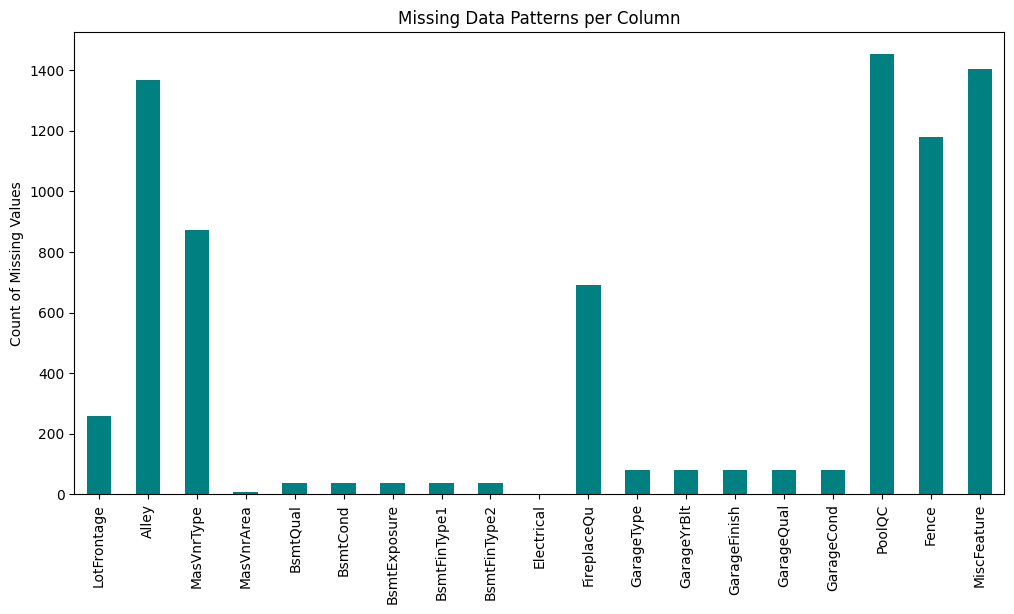

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset 
df = pd.read_csv('train.csv')

# Identify missing values
missing_counts = df.isnull().sum()
missing_data = missing_counts[missing_counts > 0]

# 2. Visualize missing data patterns
if not missing_data.empty:
    missing_data.plot(kind='bar', figsize=(12, 6), color='teal')
    plt.title("Missing Data Patterns per Column")
    plt.ylabel("Count of Missing Values")
    plt.show()
else:
    print("No missing values found.")

In [6]:
# 3. Apply median imputation for numerical columns
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# 4. Apply mode imputation for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 5. Remove columns with extremely high missing values 
#  remove columns missing more than 40% of their data
limit = len(df) * 0.4
df = df.dropna(thresh=limit, axis=1)

In [7]:
# 6. Validate dataset after cleaning
print("Total missing values after cleaning:", df.isnull().sum().sum())

# 7. Compare final shape
print(f"Cleaned Dataset Shape: {df.shape}")

# Save the deliverable file 
df.to_csv('Cleaned_Dataset.csv', index=False)
print("Cleaned file saved successfully!")

Total missing values after cleaning: 0
Cleaned Dataset Shape: (1460, 77)
Cleaned file saved successfully!
